In [27]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import base64
import io
import mysql.connector

In [28]:
def image_to_text(path):

  input_image = Image.open(path)

  #convering image to array format

  image_array = np.array(input_image)

  reader = easyocr.Reader(['en'])
  text = reader.readtext(image_array, detail = 0)

  return text, input_image

In [29]:
text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_1.png")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_9532\1212670463.py:1: SyntaxWarning: invalid escape sequence '\D'
  text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_1.png")
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_2.png")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_29260\3353244147.py:1: SyntaxWarning: invalid escape sequence '\D'
  text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_2.png")
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_3.png")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_29260\302576178.py:1: SyntaxWarning: invalid escape sequence '\D'
  text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_3.png")
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [9]:
text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_4.png")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_29260\1786382030.py:1: SyntaxWarning: invalid escape sequence '\D'
  text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_4.png")
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_5.png")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_29260\1519861745.py:1: SyntaxWarning: invalid escape sequence '\D'
  text_image, input_image = image_to_text("K:\DS\BizCard\BizCard_5.png")
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [55]:
def extracted_text(text):

  ext_dic = {"Name":[], "Designation":[], "Contacts":[], "Email":[], "Company_Name":[], "Website":[], "Address":[], "Pincode":[]}

  ext_dic["Name"].append(text[0])
  ext_dic["Designation"].append(text[1])

  for i in range(2,len(text)):

    if text[i].startswith("+") or (text[i].replace("-","").isdigit() and '-' in text[i]):

      ext_dic["Contacts"].append(text[i])

    elif "@" in text[i] and ".com" in text[i]:

      ext_dic["Email"].append(text[i])

    elif "www" in text[i] or "wwW" in text[i] or "wWw" in text[i] or "Www" in text[i] or "wWW" in text[i] or "WWw" in text[i] or "WwW" in text[i] or "WWW" in text[i] and ".com" in text[i]:

      small = text[i].lower()
      ext_dic["Website"].append(small)

    elif "Tamil Nadu" in text[i] or "TamilNadu" in text[i] or text[i].isdigit():

      ext_dic["Pincode"].append(text[i])

    elif re.match(r'^[A-Za-z]', text[i]):

      ext_dic["Company_Name"].append(text[i])

    else:

      remove_coln = re.sub(r'[,;]','',text[i])
      ext_dic["Address"].append(remove_coln)

  for key, value in ext_dic.items():

    if len(value)>0:
      concadenate = " ".join(value)
      ext_dic[key] = [concadenate]

    else:
      value = "NA"
      ext_dic[key] = [value]

  return ext_dic

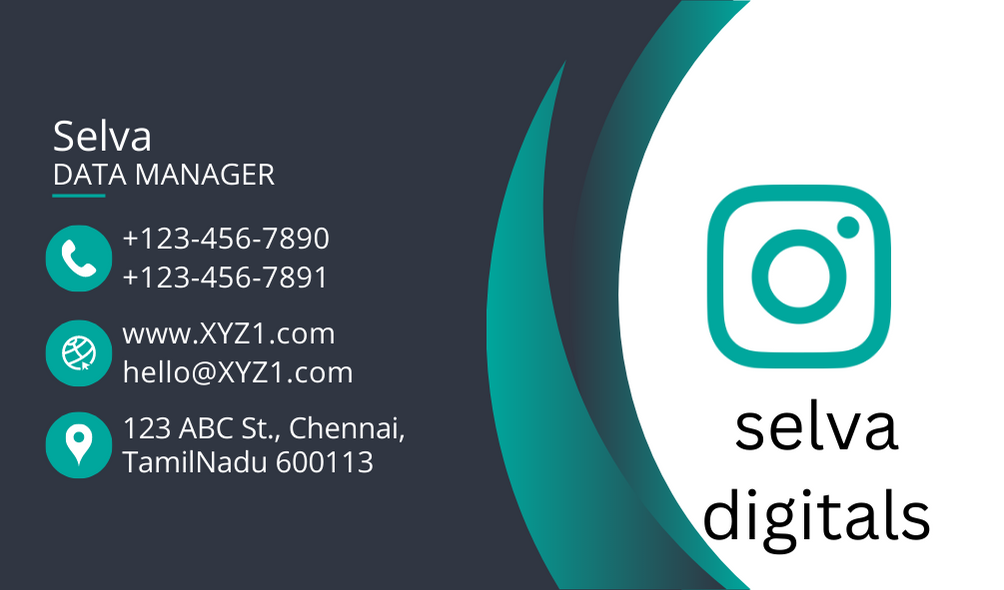

In [51]:
input_image

In [52]:
text_data = extracted_text(text_image)

In [53]:
df = pd.DataFrame(text_data)
df

,Name,Designation,Contacts,Email,Company_Name,Website,Address,Pincode
0,Selva,DATA MANAGER,+123-456-7890 +123-456-7891,hello@XYZ1.com,selva digitals,www xyzi.com,123 ABC St Chennai,TamilNadu 600113


In [34]:
#Bytes conversion

with open('K:\DS\BizCard\BizCard_1.png', 'rb') as f:
    photo = f.read()
encodestring = base64.b64encode(photo)

#Dictionary Creation

data = {"Image": [encodestring]}

df_1 = pd.DataFrame(data)

concat = pd.concat([df, df_1], axis=1)
concat

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_9532\4001455375.py:3: SyntaxWarning: invalid escape sequence '\D'
  with open('K:\DS\BizCard\BizCard_1.png', 'rb') as f:


,Name,Designation,Contacts,Email,Company_Name,Website,Address,Pincode,Image
0,Selva,DATA MANAGER,+123-456-7890 +123-456-7891,hello@XYZ1.com,selva digitals,www xyzi.com,123 ABC St Chennai,TamilNadu 600113,b'iVBORw0KGgoAAAANSUhEUgAAA+wAAAJOCAYAAAAteo3Z...


In [16]:
# import base64
# import io

# with open('K:\DS\BizCard\BizCard_1.png', 'rb') as f:
#     photo = f.read()
# encodestring = base64.b64encode(photo)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_9532\4213383516.py:4: SyntaxWarning: invalid escape sequence '\D'
  with open('K:\DS\BizCard\BizCard_1.png', 'rb') as f:


In [35]:
#SQL Connection

mydb = mysql.connector.connect(
    host = '127.0.0.1', 
    user = 'root', 
    password = 'tk09091996', 
    database = 'bizcardv3' 
)
mycursor = mydb.cursor()

# SQL Table Creation

mycursor.execute("create table if not exists bizcard_details(Name varchar(255), Designation varchar(255), Contacts varchar(255), Email varchar(255), Company_Name varchar(255), Website varchar(255), Address varchar(255), Pincode varchar(255), Image LONGBLOB)")
data = concat.values.tolist()[0]
mycursor.execute(("insert into bizcard_details(Name, Designation, Contacts, Email, Company_Name, Website, Address, Pincode, Image) values(%s, %s, %s, %s, %s, %s, %s, %s, %s)"),data)
mydb.commit()

In [38]:
#select query

select_query = "select * from bizcard_details"

mycursor.execute(select_query)

table = mycursor.fetchall()

mydb.commit()

table_df = pd.DataFrame(table, columns=("Name", "Designation", "Contacts", "Email", "Company_Name", "Website", "Address", "Pincode", "Image"))
table_df

,Name,Designation,Contacts,Email,Company_Name,Website,Address,Pincode,Image
0,Selva,DATA MANAGER,+123-456-7890 +123-456-7891,hello@XYZ1.com,selva digitals,www xyzi.com,123 ABC St Chennai,TamilNadu 600113,b'iVBORw0KGgoAAAANSUhEUgAAA+wAAAJOCAYAAAAteo3Z...


In [25]:
# mycursor.execute("create table if not exists biz(Image LONGBLOB)")
# mycursor.execute("insert into biz (Image) value (%s)", (encodestring,))
# mydb.commit()

In [23]:
# mycursor.execute("drop table biz")
# mydb.commit()

In [53]:
data_1 = concat.values.tolist()[0]

In [54]:
data_1

['Selva',
 'DATA MANAGER',
 '+123-456-7890 +123-456-7891',
 'hello@XYZ1.com',
 'selva digitals',
 'www xyzi.com',
 '123 ABC St  Chennai',
 'TamilNadu 600113',
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\xddw\x9c$Wu\xf0\xfd\xdf\xbdU\xd5izr\xda\x99\xcdY\x1b\x94\xb3VaWa\x95\x03B\x02\x0c\x18\x1bp\xe2\x01c\x0c\x0e\xaf#\x8f\x1f\x1b\x1bgccccl\x1c0\x06D\x10\xca\x11\x84\x04H\x04\xe5\xb8\n+i\xb5\xd2j\xe3\xc4\x8eUu\xef\xfbGu\xd7tO\xda\xd9\xa4\x9dp\xbe\x9f\xcf\xeeLwWWWW\xf7t\xf5\xa9s\xef9\xea\x84\xd3\xce\xb7\x08!\x84\x10B\x08q\x94X@Y\x8bU\n\x00\x15\x86\xe4z:)\xb65G\xb7*\x05\xaafYT\xbcl\xf5z\x88\x96\xb1\xb5WVoS\xf1B\xd1\xed5\xeb\x8b~\xd6\xdc\x1e_VX5r\xb3\xad[f\xfc\xc7f\xd4\xb2J),\xe0%<N?\xeddz{\xe7a\xad\x1d\xb3<\xa8\xcav\xd5\xac\x0f\x05*z\xee\x16(\x9a\x90_\\\xb6\x9a3;\xbb\xa3m\xb0\x16U\xf3\xbc\x84\x10\xb3\x93{\xb47@\x08!\x84\x10B\xcc]c\x83uC\xa1\xab\x8d\xbe\xb5\xcb\xf0\xb3iTh\xb0JE\xc1\xaf"\x0e`\x155\x97\xd5HpL\xcdO\

In [41]:
mydb = mysql.connector.connect(
    host = '127.0.0.1', 
    user = 'root', 
    password = 'tk09091996', 
    database = 'bizcardv3' 
)
mycursor = mydb.cursor()

select_query = "select Name from bizcard_details"

mycursor.execute(select_query)

table = mycursor.fetchall()

mydb.commit()

del_name = []

for i in table:
    del_name.append(i[0])

del_name

['Selva', 'Amit kumar', 'KARTHICK']